In [44]:
import os
import re
import csv
import json
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn 
from sklearn.preprocessing import MinMaxScaler

sns.set(style='darkgrid')


In [45]:
teams_path = "D:/Git_desktop/Intro_data_science_new/Crawl_data_and _reformat_data/teams_all_season.csv"

In [46]:
teams_df = pd.read_csv(teams_path)
teams_df.drop(['Unnamed: 0'], axis=1, inplace=True)
teams_df = teams_df.replace("-1", None)
teams_df = teams_df.replace(-1, 0)
teams_df = teams_df.replace("tie", "draw")
teams_df.head

C:\Users\ngduc\AppData\Local\Temp\ipykernel_2616\3624565173.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  teams_df = pd.read_csv(teams_path)


<bound method NDFrame.head of        id_match   season               name  id  score result formation  \
0         75290  2022-23        Southampton  20      4   draw   4-2-3-1   
1         75290  2022-23          Liverpool  10      4   draw     4-3-3   
2         75289  2022-23  Manchester United  12      2    win   4-2-3-1   
3         75289  2022-23             Fulham  34      1   lose   4-2-3-1   
4         75288  2022-23     Leicester City  26      2    win   4-2-3-1   
...         ...      ...                ...  ..    ...    ...       ...   
24045         3  1992-93      Middlesbrough  13      1   lose         0   
24046         2  1992-93            Chelsea   4      1   draw         0   
24047         2  1992-93    Oldham Athletic  16      1   draw         0   
24048         1  1992-93            Arsenal   1      2   lose         0   
24049         1  1992-93       Norwich City  14      4    win         0   

       lineup_player_id_0  lineup_player_id_1  lineup_player_id_2  ..

In [47]:
list(teams_df.columns)

['id_match',
 'season',
 'name',
 'id',
 'score',
 'result',
 'formation',
 'lineup_player_id_0',
 'lineup_player_id_1',
 'lineup_player_id_2',
 'lineup_player_id_3',
 'lineup_player_id_4',
 'lineup_player_id_5',
 'lineup_player_id_6',
 'lineup_player_id_7',
 'lineup_player_id_8',
 'lineup_player_id_9',
 'lineup_player_id_10',
 'sub_player_id_0',
 'sub_player_id_1',
 'sub_player_id_2',
 'sub_player_id_3',
 'sub_player_id_4',
 'sub_player_id_5',
 'sub_player_id_6',
 'sub_player_id_7',
 'sub_player_id_8',
 'formation_used',
 'open_play_pass',
 'possession_percentage',
 'poss_lost_ctrl',
 'poss_lost_all',
 'duel_won',
 'fwd_pass',
 'touches',
 'total_pass',
 'total_back_zone_pass',
 'aerial_won',
 'successful_open_play_pass',
 'long_pass_own_to_opp_success',
 'total_throws',
 'ball_recovery',
 'passes_right',
 'total_chipped_pass',
 'total_final_third_passes',
 'accurate_back_zone_pass',
 'accurate_pass',
 'total_cross_nocorner',
 'accurate_keeper_throws',
 'put_through',
 'accurate_fwd_z

# EDA team

## All_team and All season

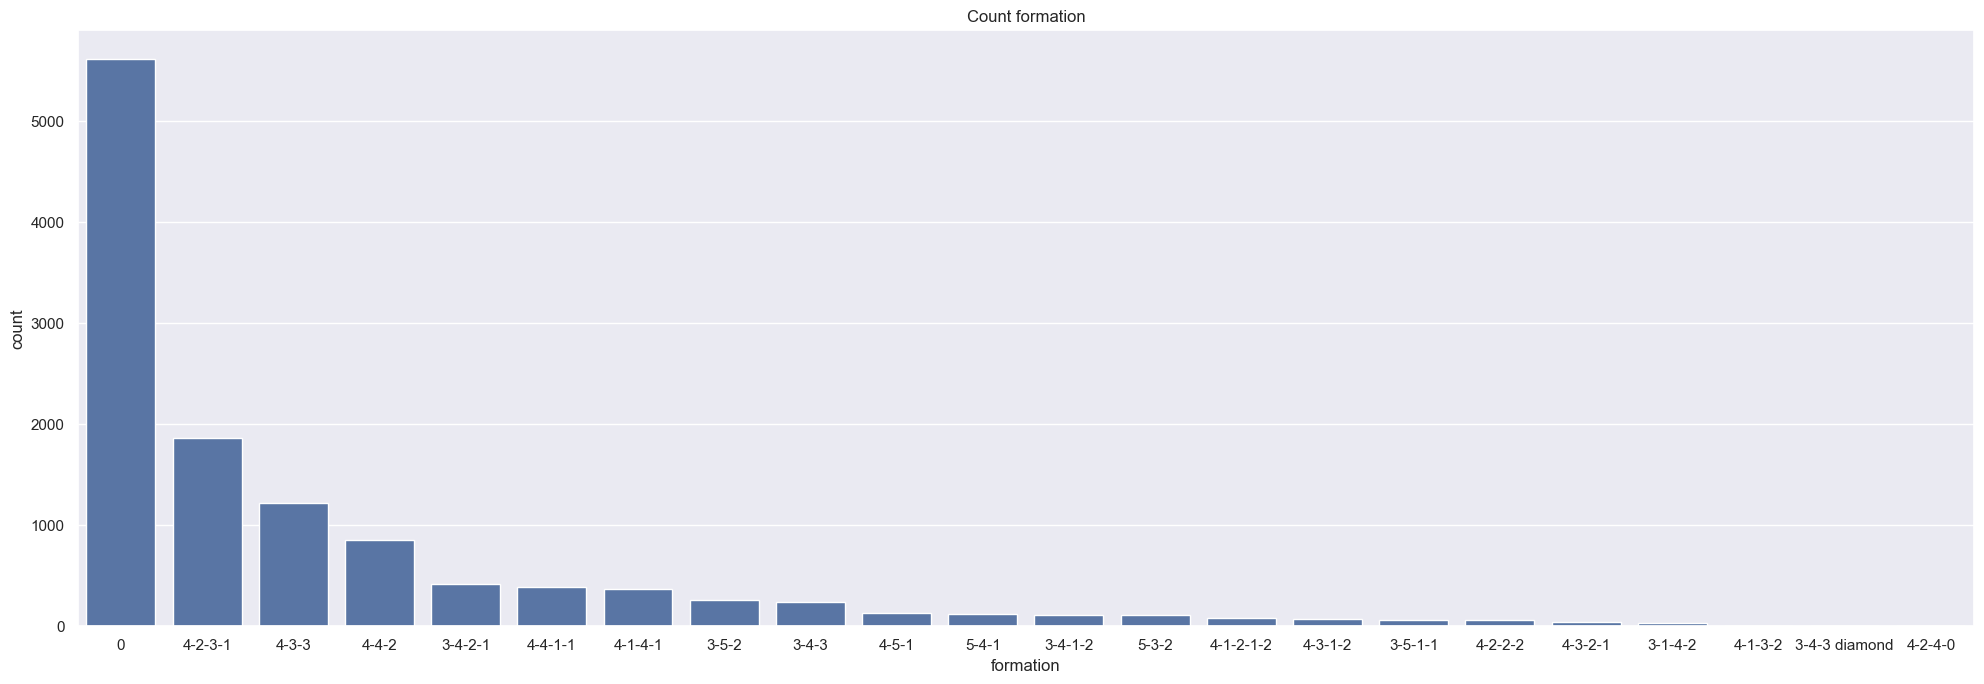

In [48]:
# formation bar chart
plt.figure(figsize=(20, 7))
plt.title('Count formation')
sns.countplot(data=teams_df, x='formation', order = teams_df['formation'].value_counts().index)
plt.tight_layout()
plt.show()

C:\Users\ngduc\AppData\Local\Temp\ipykernel_2616\3451034546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumform['count'] = [1]*sumform.shape[0]


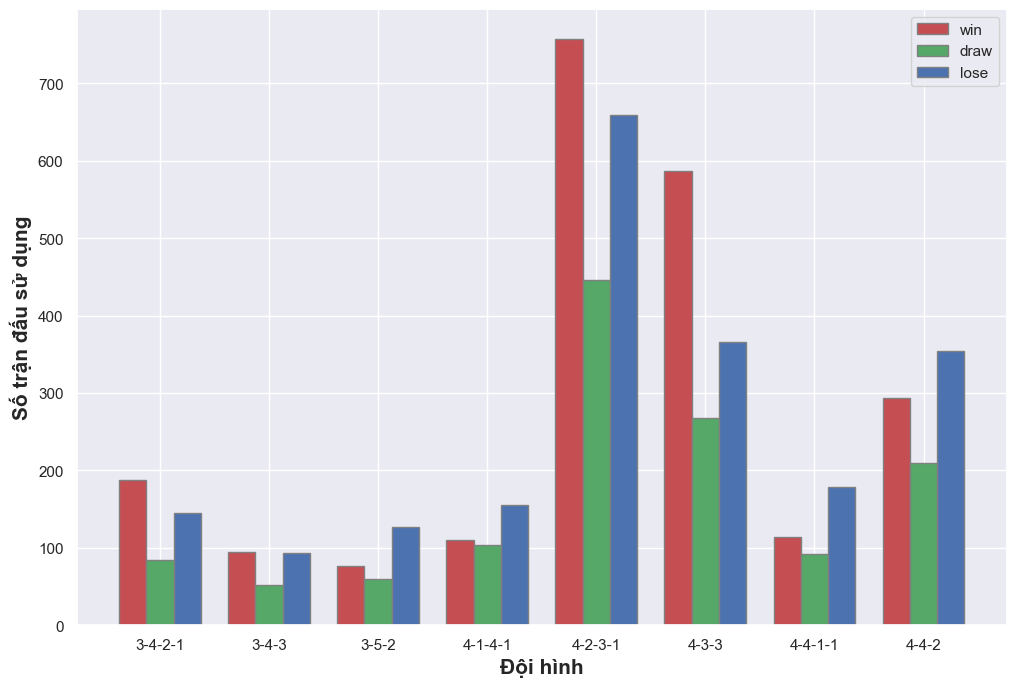

In [49]:
#total win,lose, draw follow in formation
# Set position of bar on X axis

sumform = teams_df[["formation", "result"]]
sumform['count'] = [1]*sumform.shape[0]
sumform = sumform.groupby(["formation", "result"]).sum().reset_index()
sumform = sumform.loc[sumform["formation"]!= 0]

check = sumform.groupby('formation').sum().reset_index()
check = check.loc[check["count"] > 200]
check = check["formation"].values.tolist()

sumform = sumform.loc[sumform["formation"].isin(check)]

win = sumform.loc[sumform['result'] == "win"]["count"].values
draw = sumform.loc[sumform['result'] == "draw"]["count"].values
lose = sumform.loc[sumform['result'] == "lose"]["count"].values

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
br1 = np.arange(len(win))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1,win, color ='r', width = barWidth,
		edgecolor ='grey', label ='win')
plt.bar(br2, draw, color ='g', width = barWidth,
		edgecolor ='grey', label ='draw')
plt.bar(br3, lose, color ='b', width = barWidth,
		edgecolor ='grey', label ='lose')
# plt.bar(br4, sumform['%win'], color ='orange', width = barWidth,
# 		edgecolor ='grey', label ='win%')

# Adding Xticks
plt.xlabel('Đội hình', fontweight ='bold', fontsize = 15)
plt.ylabel('Số trận đấu sử dụng', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(check))],
		check)

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


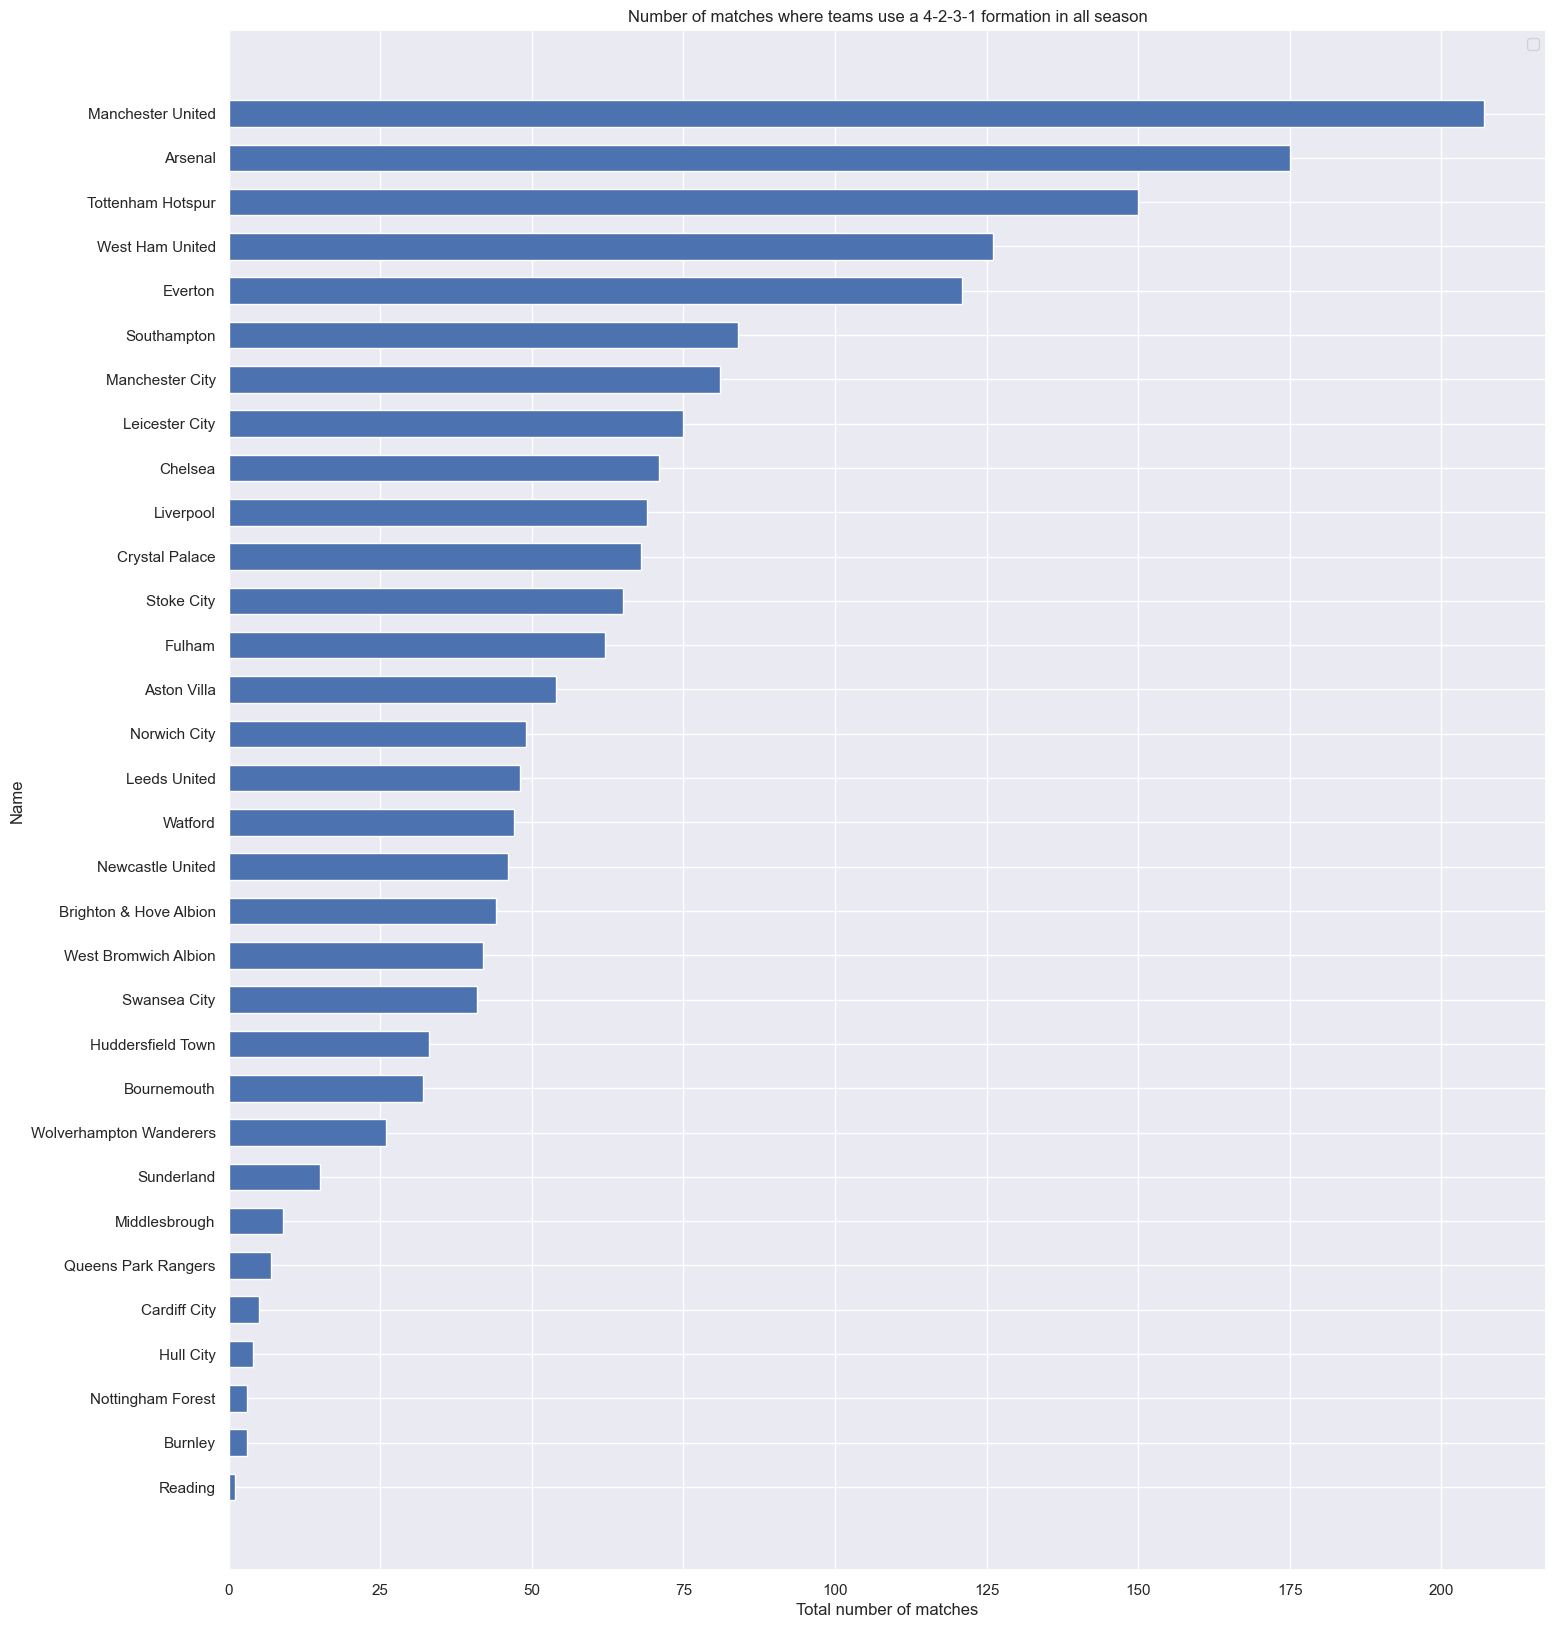

In [69]:
# 
def format_bar_team_season(formation = "4-2-3-1",filter_type='Season-Season', season='2022-23'):

    if filter_type == 'One Season':
        data_df = teams_df.loc[(teams_df["season"]== season) & (teams_df["formation"] == formation)]
        data_df = data_df[["name"]]
        data_df["count"] = [1]*data_df.shape[0]
        
        data_df = data_df.groupby(["name"]).sum().reset_index()
        data_df = data_df.sort_values(by='count', ascending=True)
        fig, ax = plt.subplots(figsize=(17, 20))
        # Vẽ bar chart ngang
        ax.barh(data_df["name"], data_df['count'], height=0.6)
        ax.set_title(f'Number of matches where teams use a {formation} formation in season {season}')
        ax.set_xlabel('Total number of matches')
        ax.set_ylabel('Name')
        ax.legend()
        plt.show()
        return
        
    elif filter_type == 'Season-Season':
        data_df = teams_df.loc[teams_df["formation"] == formation]
        data_df = data_df[["name"]]
        data_df["count"] = [1]*data_df.shape[0]
        
        data_df = data_df.groupby(["name"]).sum().reset_index()
        data_df = data_df.sort_values(by='count', ascending=True)
        fig, ax = plt.subplots(figsize=(17, 20))
        # Vẽ bar chart ngang
        ax.barh(data_df["name"], data_df['count'], height=0.6)
        ax.set_title(f'Number of matches where teams use a {formation} formation in all season')
        ax.set_xlabel('Total number of matches')
        ax.set_ylabel('Name')
        ax.legend()
        plt.show()
        return
    else:
        raise Exception()

format_bar_team_season()


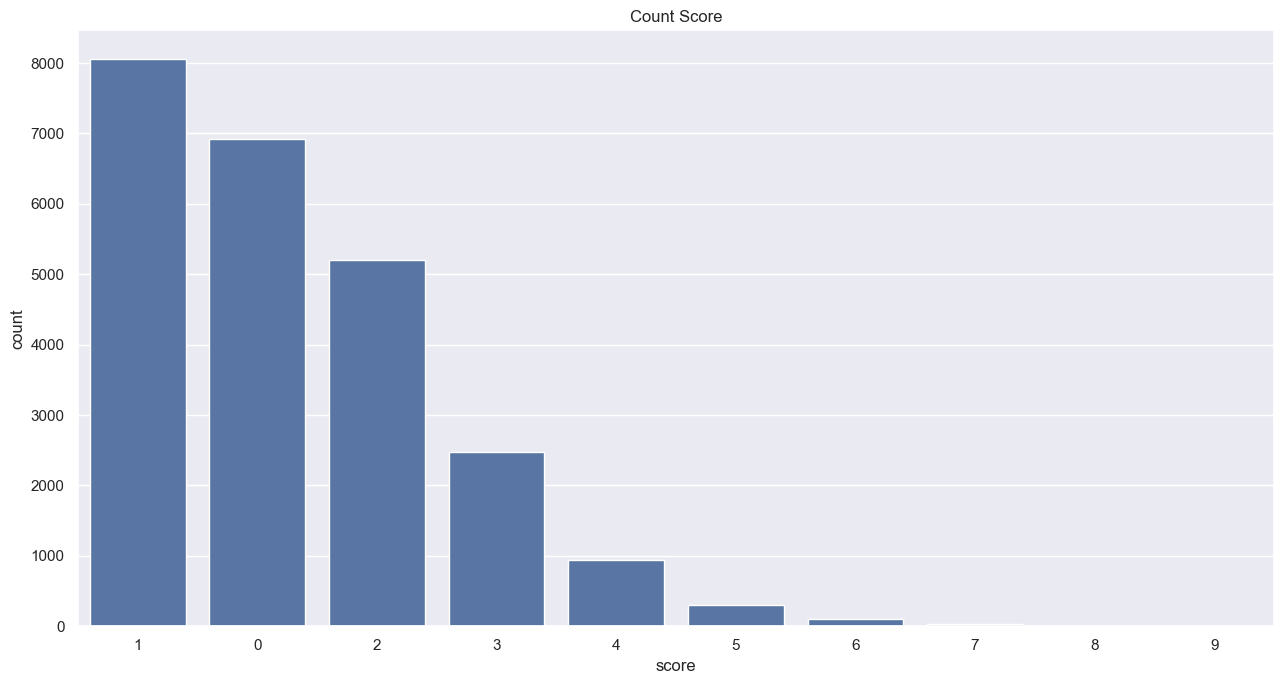

In [50]:
# score bar chart
plt.figure(figsize=(13, 7))
plt.title('Count Score')
sns.countplot(data=teams_df, x='score', order = teams_df['score'].value_counts().index)
plt.tight_layout()
plt.show()

In [51]:
teams_df["score"].mean()

1.3334303534303533

## All season follow each team

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


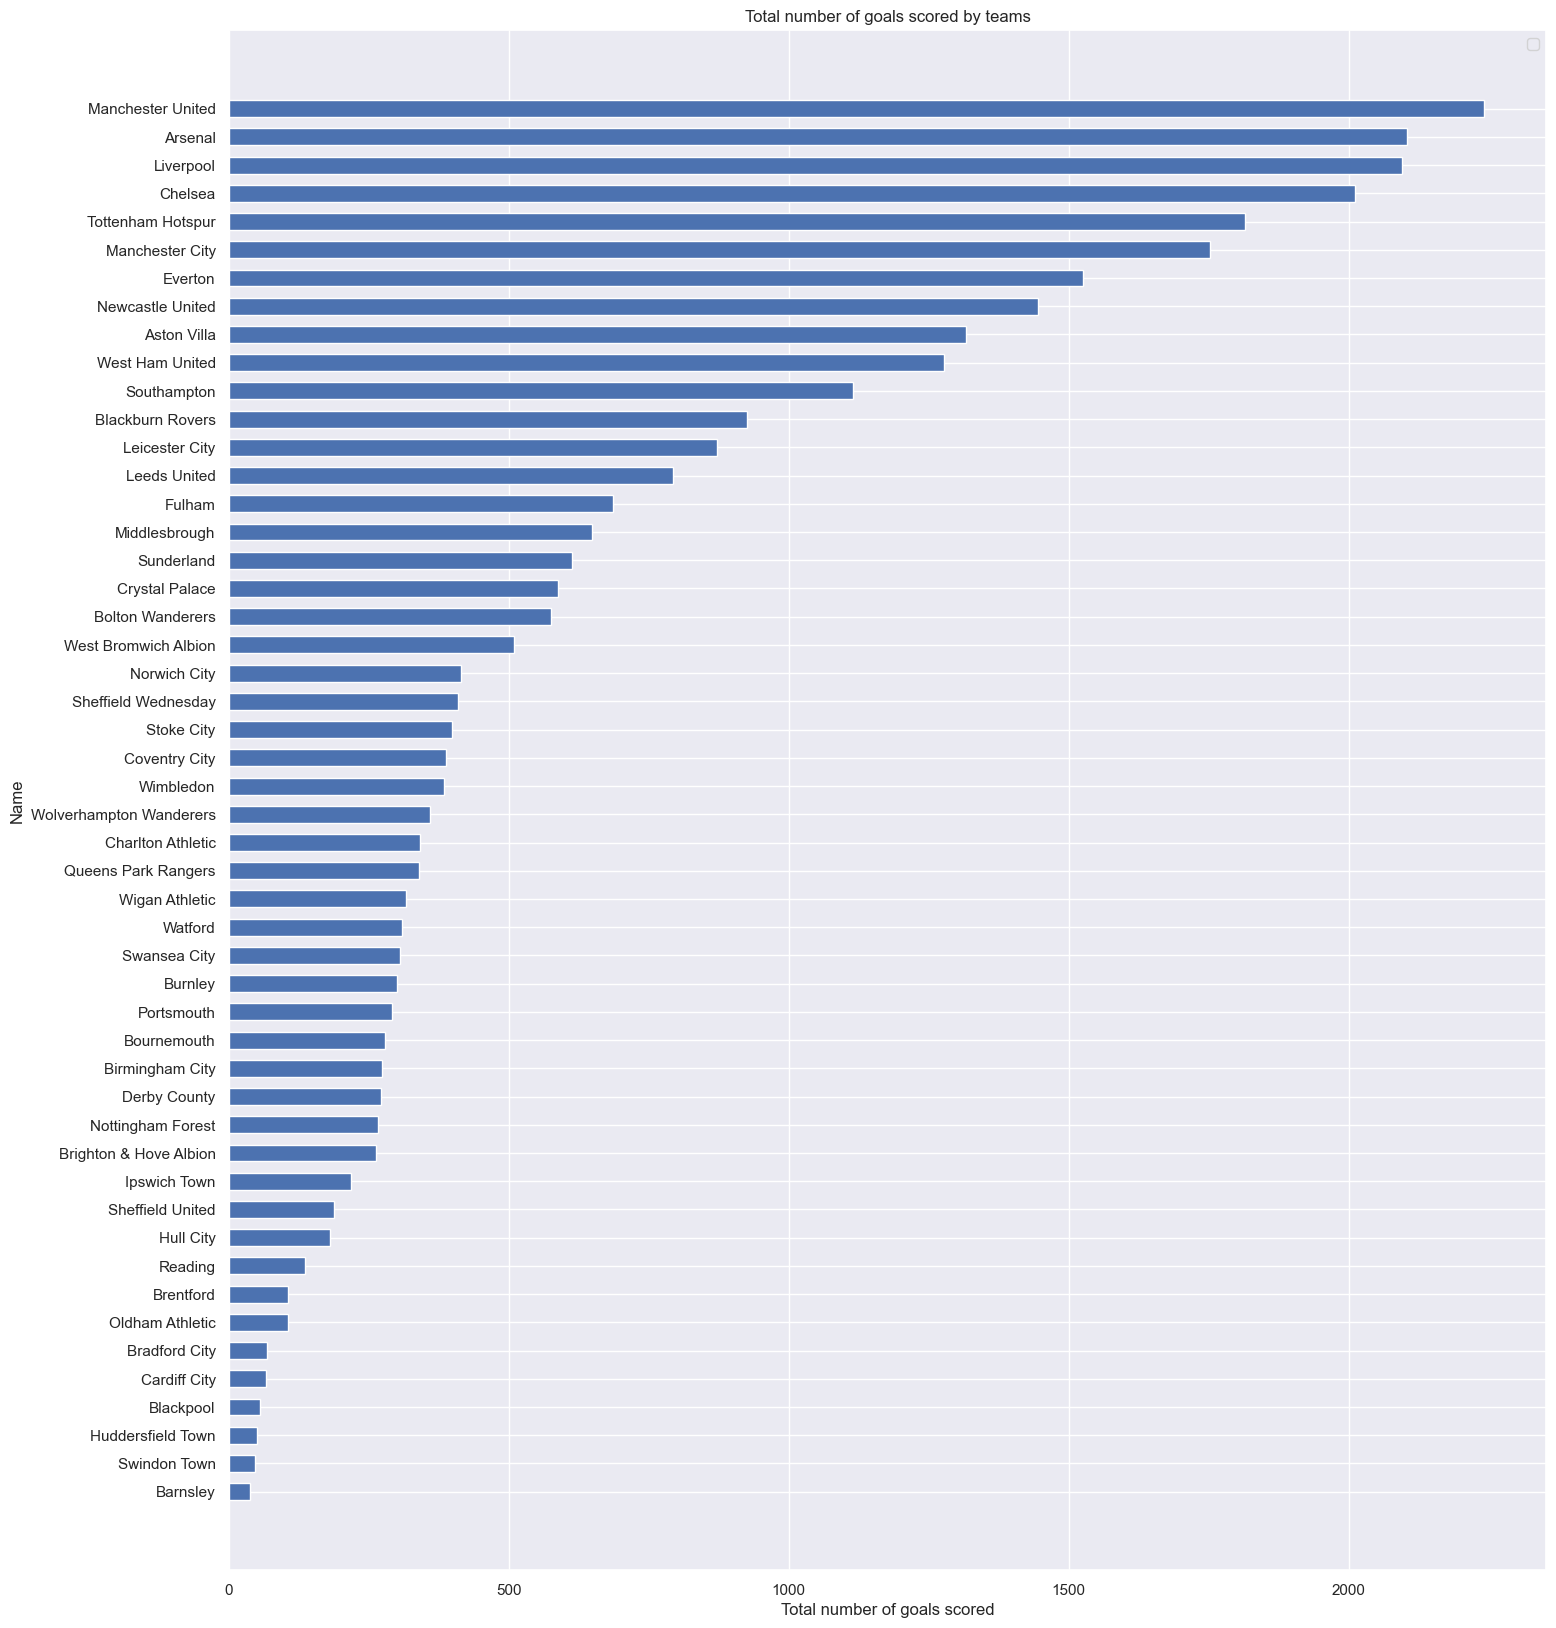

In [52]:
def score_bar_result(filter_type='Season-Season', season='2022-23'):

    if filter_type == 'One Season':
        data_df = teams_df.loc[teams_df["season"]== season]
        data_df = data_df[["name", "score"]].groupby(["name"]).sum().reset_index()
        data_df = data_df.sort_values(by='score', ascending=True)
        fig, ax = plt.subplots(figsize=(17, 20))
        # Vẽ bar chart ngang
        ax.barh(data_df["name"], data_df['score'], height=0.6)
        ax.set_title('Total number of goals scored by teams')
        ax.set_xlabel('Total number of goals scored')
        ax.set_ylabel('Name')
        ax.legend()
        plt.show()
        return
    elif filter_type == 'Season-Season':
        data_df = teams_df
        data_df = data_df[["id","name", "score"]].groupby(["id", "name"]).sum().reset_index()
        data_df = data_df.sort_values(by='score', ascending=True)
        fig, ax = plt.subplots(figsize=(17, 20))
        # Vẽ bar chart ngang
        ax.barh(data_df["name"], data_df['score'], height=0.6)
        ax.set_title('Total number of goals scored by teams')
        ax.set_xlabel('Total number of goals scored')
        ax.set_ylabel('Name')
        ax.legend()
        plt.show()
        return
    else:
        raise Exception()

score_bar_result()

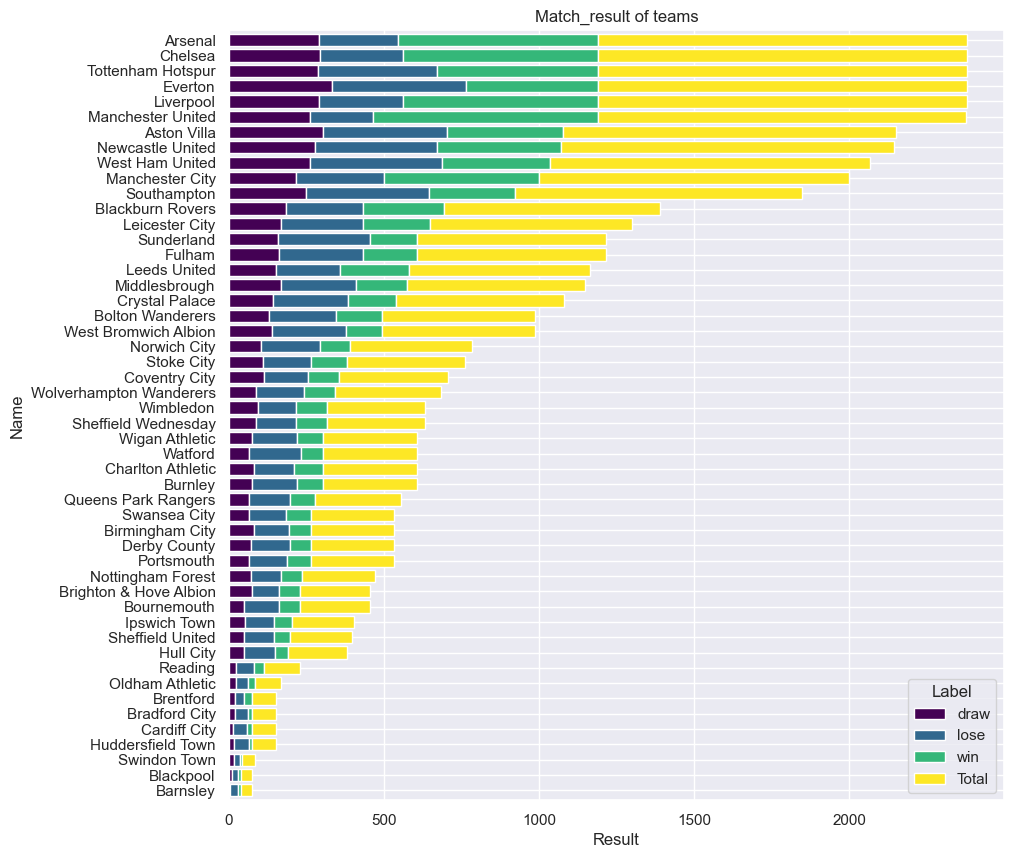

In [53]:
# Stacked_bar_result (win, tie, lose)

def stack_bar_result(filter_type='Season-Season', season='2022-23'):
    
    if filter_type == 'One Season':
        data_df = teams_df.loc[teams_df["season"]== season]
        print(data_df)
        data_df = data_df[["name", "result"]].groupby(["name", "result"]).size().unstack(fill_value=0)

                
        data_df['Total'] = data_df.sum(axis=1)
        data_df = data_df.sort_values(by='Total', ascending=True)
        
        data_df.plot(kind='barh', stacked=True, colormap='viridis', width=0.8, figsize = (10,10))
        plt.xlabel('Result')
        plt.ylabel('Name')
        plt.title('Match_result of teams')
        plt.legend(title='Label')
        plt.show()
        return
    elif filter_type == 'Season-Season':
        data_df = teams_df
        data_df = data_df[["name", "result"]].groupby(["name", "result"]).size().unstack(fill_value=0)
        
        data_df['Total'] = data_df.sum(axis=1)
        data_df = data_df.sort_values(by='Total', ascending=True)
        
        data_df.plot(kind='barh', stacked=True, colormap='viridis', width=0.8, figsize = (10,10))
        plt.xlabel('Result')
        plt.ylabel('Name')
        plt.title('Match_result of teams')
        plt.legend(title='Label')
        plt.show()
        return
    else:
        raise Exception()

stack_bar_result()

C:\Users\ngduc\AppData\Local\Temp\ipykernel_2616\596091397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[attribute_cols] = scaler.fit_transform(df[attribute_cols])
C:\Users\ngduc\AppData\Local\Temp\ipykernel_2616\596091397.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Result_numeric'] = data_df['result'].map(result_mapping)


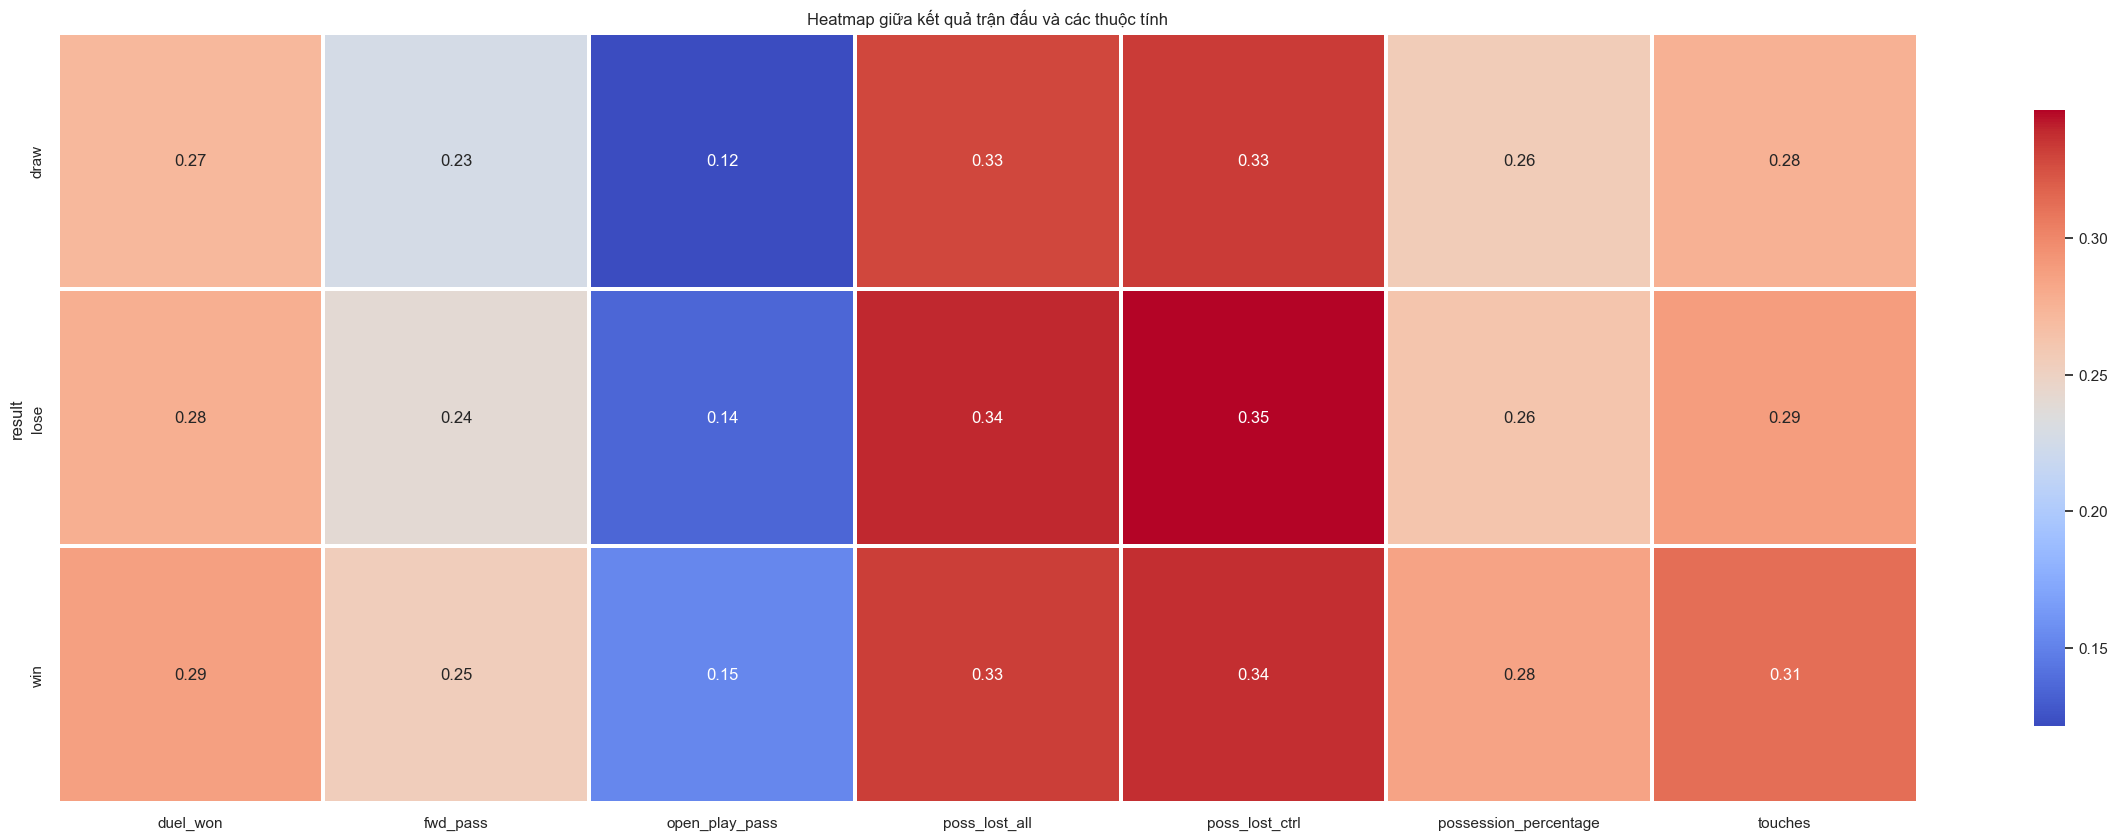

In [54]:
# Stacked_bar_result (win, tie, lose)
def normalize_attributes(df, attribute_cols):
    scaler = MinMaxScaler()
    df[attribute_cols] = scaler.fit_transform(df[attribute_cols])
    return df


def heatmap_result(filter_type='Season-Season', season='2022-23', attribute = ['open_play_pass','possession_percentage','poss_lost_ctrl','poss_lost_all','duel_won','fwd_pass','touches',]):
    if filter_type == 'One Season':
        data_df = teams_df.loc[teams_df["season"]== season]
        data_df = data_df[["name", "result"]+ attribute]

        # Normalize the attributes
        data_df = normalize_attributes(data_df, attribute)
        # Chuyển đổi cột 'Result' thành dạng số
        result_mapping = {'win': 2, 'draw': 1, 'lose': 0}
        data_df['Result_numeric'] = data_df['result'].map(result_mapping)
        pivot_table = data_df.pivot_table(index='result', values= attribute)
        plt.figure(figsize=(30, 10))
        sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.5, cbar_kws={"shrink": 0.8})
        plt.title('Heatmap giữa kết quả trận đấu và các thuộc tính')
        plt.show()
        return
    elif filter_type == 'Season-Season':
        data_df = teams_df
        data_df = data_df[["name", "result"]+ attribute]
        # Normalize the attributes
        data_df = normalize_attributes(data_df, attribute)
        # Chuyển đổi cột 'Result' thành dạng số
        result_mapping = {'win': 2, 'draw': 1, 'lose': 0}
        data_df['Result_numeric'] = data_df['result'].map(result_mapping)
        pivot_table = data_df.pivot_table(index='result', values= attribute)
        plt.figure(figsize=(30, 10))
        sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.5, cbar_kws={"shrink": 0.8})
        plt.title('Heatmap giữa kết quả trận đấu và các thuộc tính')
        plt.show()
        return
    else:
        raise Exception()

heatmap_result()

## Follow a team

In [55]:
# soos tran thang thua theo nam
# so ban ghi theo tung nam
# 

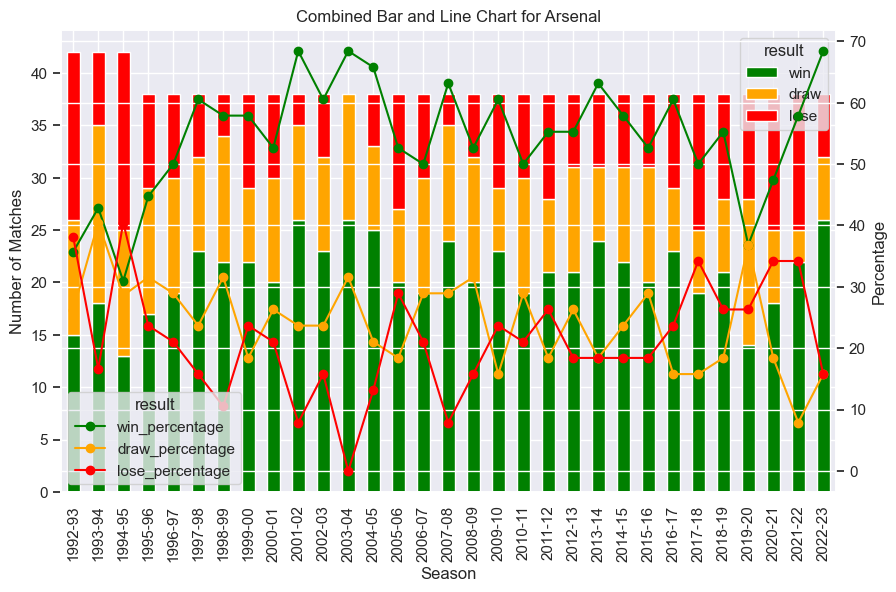

In [56]:
def plot_combined_bar_line_chart_result(teams_df, team_name):
    team_data = teams_df.loc[teams_df['name'] == team_name]
    # Group by season and result
    result_counts = team_data.groupby(['season', 'result']).size().unstack(fill_value=0)
    # Calculate total matches per season
    result_counts['total_matches'] = result_counts.sum(axis=1)

    # Calculate percentage of wins, draws, and losses
    result_counts['win_percentage'] = result_counts['win'] / result_counts['total_matches'] * 100
    result_counts['draw_percentage'] = result_counts['draw'] / result_counts['total_matches'] * 100
    result_counts['lose_percentage'] = result_counts['lose'] / result_counts['total_matches'] * 100

    # Plot combined bar and line chart
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar plot for wins, draws, and losses
    result_counts[['win', 'draw', 'lose']].plot(kind='bar', stacked=True, ax=ax1, color=['green', 'orange', 'red'])

    # Line plot for win percentage, draw percentage, and lose percentage
    ax2 = ax1.twinx()
    result_counts[['win_percentage', 'draw_percentage', 'lose_percentage']].plot(kind='line', marker='o', ax=ax2, color=['green', 'orange', 'red'])

    # Set labels and title
    ax1.set_xlabel('Season')
    ax1.set_ylabel('Number of Matches')
    ax2.set_ylabel('Percentage')
    plt.title(f'Combined Bar and Line Chart for {team_name}')

    # Show the plot
    plt.show()

# Example usage
plot_combined_bar_line_chart_result(teams_df, 'Arsenal')

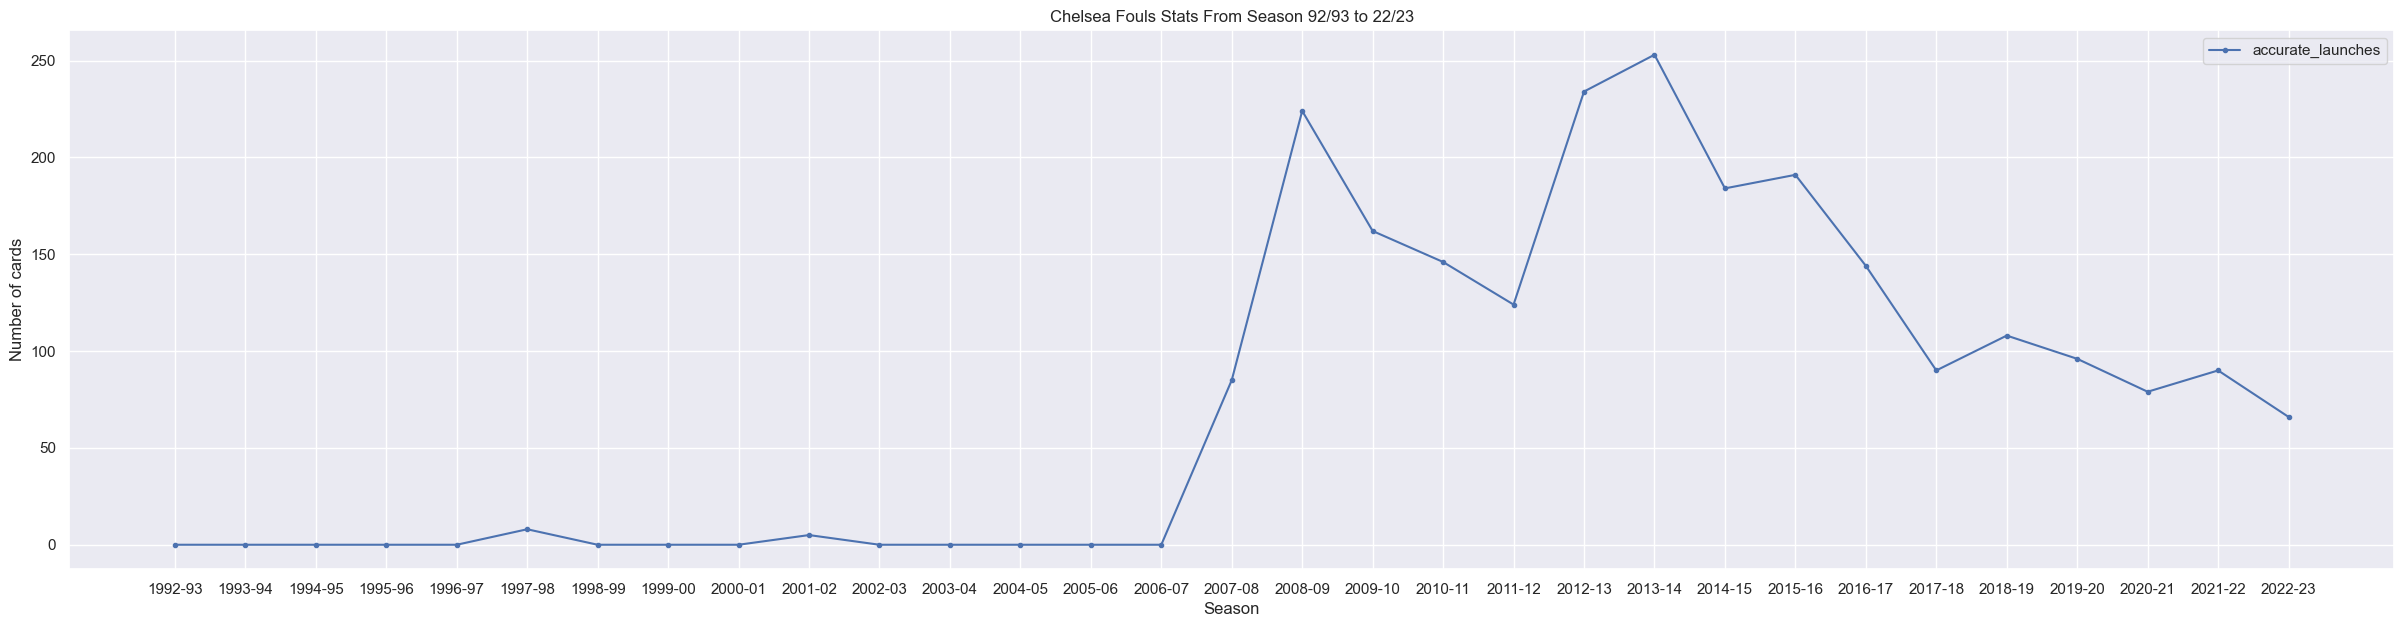

In [57]:
def line_chart_attibute(teams_df, team_name, attribute = ["total_red_card", "total_yel_card"]):
    team_data = teams_df.loc[teams_df['name'] == team_name]
    team_data = team_data[["season"]+ attribute]
    team_data = team_data.groupby("season").sum().reset_index()
    # Group by season and result
    #Define list of x,y values
    seasons = list(team_data['season'])
    plt.figure(figsize=(30,7))
    for att in attribute:
            
        red = list(team_data[att])
        #Plot data
        plt.plot(seasons, red, marker='.', label=att)
    plt.legend(attribute)
    plt.xlabel('Season')
    plt.ylabel('Number of cards')
    plt.title('Chelsea Fouls Stats From Season 92/93 to 22/23')
    plt.show()

# Example usage
line_chart_attibute(teams_df, 'Arsenal', attribute = ["accurate_launches"])

## Compare two teams

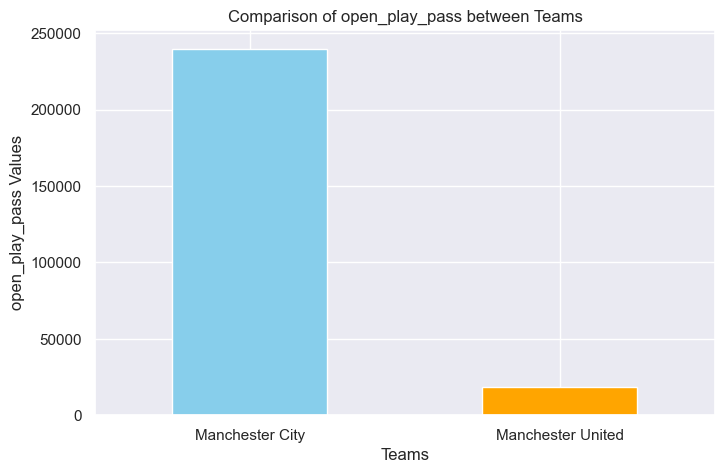

In [58]:
def compare_team_attributes(teamA, teamB, filter_type='Season-Season', season='2022-23', attribute = 'open_play_pass'):
    if filter_type == 'One Season':
        data_df = teams_df.loc[(teams_df["season"]== season) & (teams_df["name"] == teamB) | (teams_df["name"] == teamA)]
        data_df = data_df[["name", attribute]]
        data_df = data_df.groupby("name").sum().reset_index()
        # Set the team column as the index for better visualization
        data_df.set_index('name', inplace=True)
        
        # Plotting single-bar chart
        fig, ax = plt.subplots(figsize=(8, 5))
        data_df[attribute].plot(kind='bar', color=['skyblue', 'orange'], ax=ax)
        ax.set_title(f'Comparison of {attribute} between Teams')
        ax.set_xlabel('Teams')
        ax.set_ylabel(f'{attribute} Values')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        plt.show()
        return
    elif filter_type == 'Season-Season':
        data_df = teams_df.loc[(teams_df["name"] == teamB) | (teams_df["name"] == teamA)]
        data_df = data_df[["name", attribute]]
        data_df = data_df.groupby("name").sum().reset_index()
        print(data_df)
        # Set the team column as the index for better visualization
        data_df.set_index('name', inplace=True)
        # Plotting single-bar chart
        fig, ax = plt.subplots(figsize=(8, 5))
        data_df[attribute].plot(kind='bar', color=['skyblue', 'orange'], ax=ax)
        ax.set_title(f'Comparison of {attribute} between Teams')
        ax.set_xlabel('Teams')
        ax.set_ylabel(f'{attribute} Values')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        plt.show()
        return
    else:
        raise Exception()
compare_team_attributes('Manchester City', 'Manchester United', filter_type='One Season')
